In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
# Importando os dados

investimentos = pd.read_csv('MKT.csv')

# Conhecendo os dados

In [ ]:
# Conhecendo as colunas da tabela.

investimentos.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Observando se algum tipo está em desacordo com o esperado e conferindo se existem dados nulos.

investimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Conferindo se há dados duplicados

duplicados = investimentos.duplicated().any()
duplicados

False

In [ ]:
# Entendendo como os valores se comportam.

investimentos.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Como os valores da média e da mediana são parecidos, provavelmente não há muitos outliars que distorcem o valor da média.

In [ ]:
# Observando outliars através do gráfico de boxplot

px.box(investimentos)

Ao olhar os valores de média, mediana e o gráfico de boxplot, fica claro que não há valores que fogem dos padrões. No entanto, nota-se que os valores de youtube possuem grandes variações.

# Analisando os dados

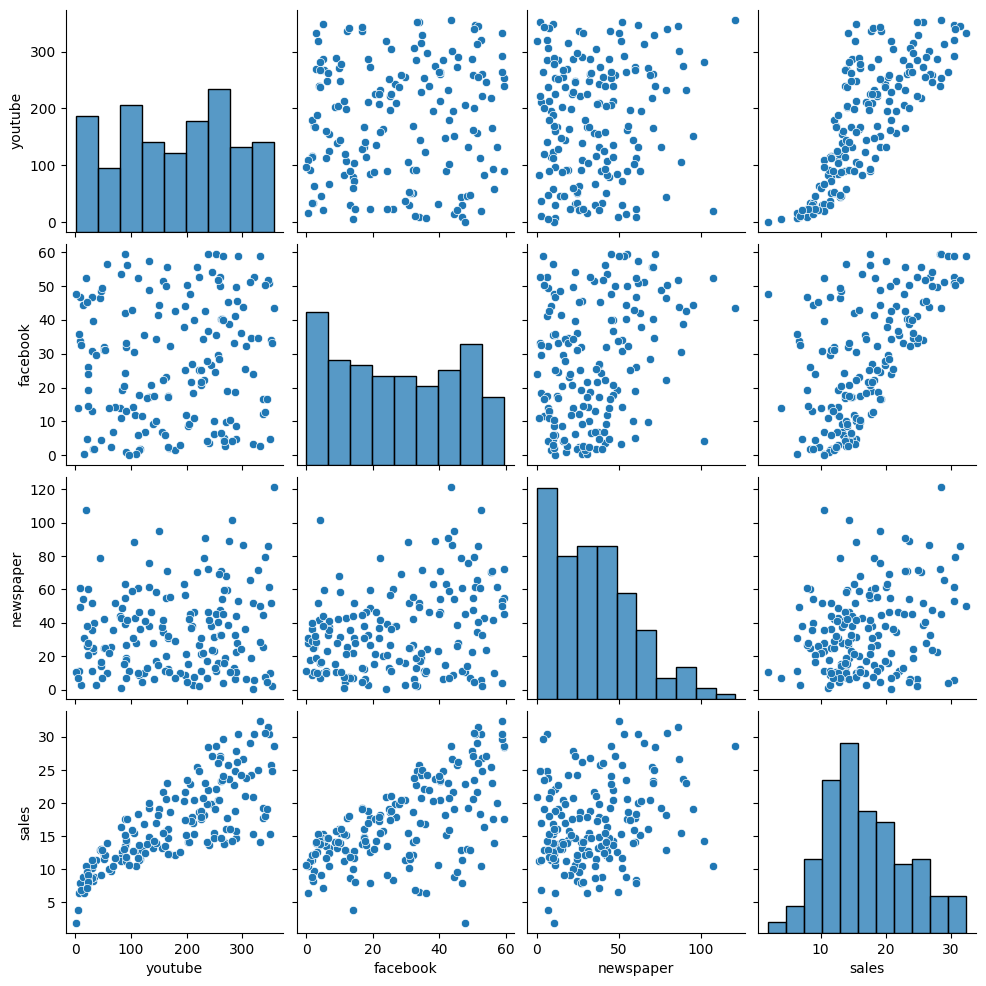

In [ ]:
# Analisando a correlação entre os dados de maneira gráfica.

sns.pairplot(investimentos);

In [ ]:
# Obtendo o nome das colunas para utilizar na comparação dos dados com a coluna price.

investimentos.keys()

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

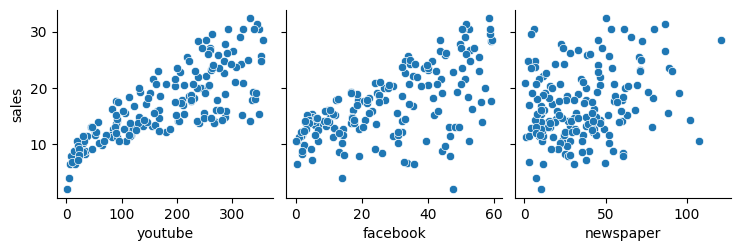

In [ ]:
# Olhando a relação das plataformas com as vendas.

sns.pairplot(investimentos, x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales');

Ao observar o gráfico acima, nota-se que o youtube é o valor que se relaciona mais diretamente com as vendas. O facebook também tem um comportamento proporcional as vendas, mas é um pouco mais disperso. Já o newspaper, nota-se um comportamento muito mais disperso que os outros, ou seja, provavelmente o newspaper tenha baixo impacto nas vendas ao se comparar com os demais.

In [ ]:
# Analisando a correlação entre os dados de maneira numérica.

investimentos.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

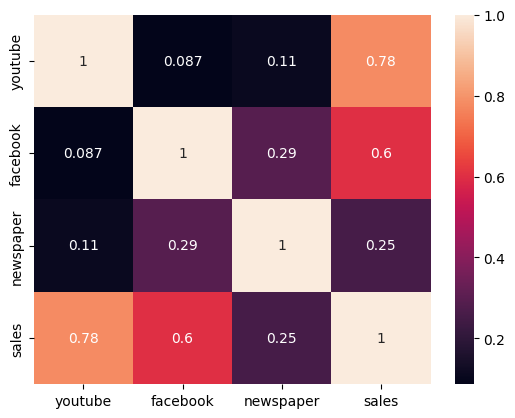

In [ ]:
# Analisando a correlação entre os dados de maneira gráfica e numérica utilizando um mapa de calor.

sns.heatmap(investimentos.corr(),annot=True)

Como já havia sido comentado, o youtube realmente possui uma maior influência que os demais sobre as vendas. Porém, o facebook também tem grande participação nas vendas. O newpaper, como esperado, possui baixa influência nas vendas.

In [ ]:
# Entendendo como estão ocorrendo os investimentos.

soma_investimentos = investimentos.sum().reset_index()
soma_investimentos = soma_investimentos.rename(columns={'index': 'plataforma', 0: 'soma_dos_investimentos'})
soma_investimentos = soma_investimentos.drop(index=3)
soma_investimentos

,plataforma,soma_dos_investimentos
0,youtube,30441.60
1,facebook,4731.84
2,newspaper,6026.04


Como o facebook tem maior correlação sobre as vendas do que o newspaper, vale realizar um teste para ver o comportamento das vendas ao aumentar o investimento do facebbok e diminuir o investimento no newspaper.

# Treinando o modelo

In [ ]:
# Definindo os eixos.

X = investimentos[['youtube', 'facebook', 'newspaper']]
y = investimentos[['sales']]

In [ ]:
# Separando as variaveis adotando 70% dos dados para o treino e 30% para os testes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Conferindo se os tamanhos das variáveis estão de acordo com o esperado

print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (119, 3)
Tamanho de X_test: (52, 3)
Tamanho de y_train: (119, 1)
Tamanho de y_test: (52, 1)


In [ ]:
# Criando uma variavél para regressão linear

lr = LinearRegression()

In [ ]:
# Treinando o modelo

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizando uma previsão utilizando os valores de X_test (X de teste)

y_pred = lr.predict(X_test)

In [ ]:
# Realizando uma comparação entre dados reais (y_test) e dados que foram obtidos através de previsões (y_pred) utilizando o metodo R²

r2 = r2_score(y_test, y_pred)
print(f'Como o valor de R² foi de {r2:.4f}, isso quer dizer que em {r2:.2%} das vezes, os valores preditos serão iguais ou próximos dos valores reais.')

Como o valor de R² foi de 0.8824, isso quer dizer que em 88.24% das vezes, os valores preditos serão iguais ou próximos dos valores reais.


O valor de R² varia de 0 a 1, quanto mais perto de 1 melhor é a predição. Ou seja, 0,88 indica que nossos valores preditos em 88% da vezes serão iguais ou muito próximos dos valores reais, como pode ser visto no gráfico abaixo.

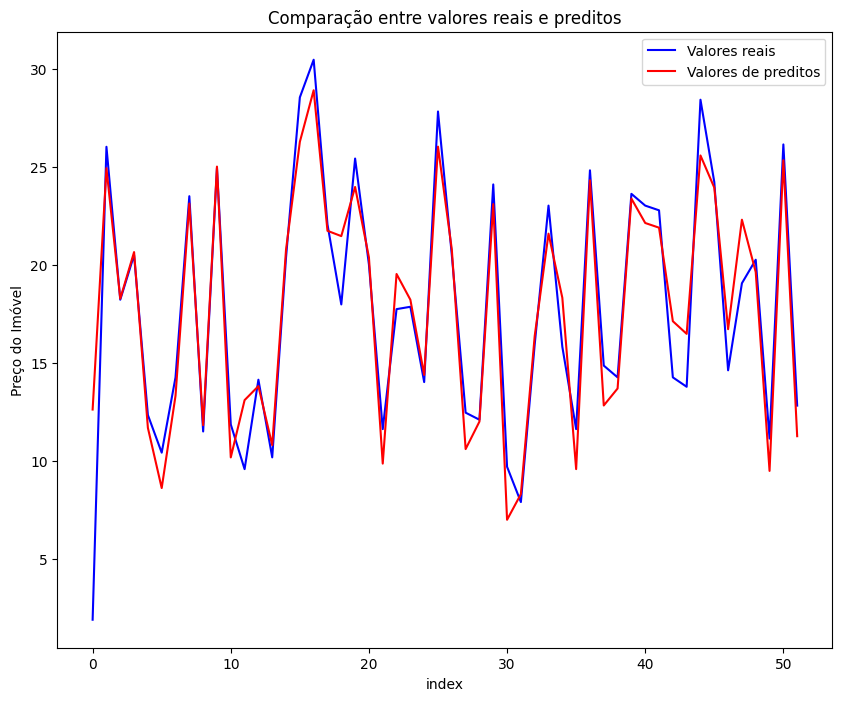

In [ ]:
# Foi criada uma variável c para ser o index do gráfico. Este gráfico serve para comparar os valores de y_test (valores reais) com os valores de y_pred (valores preditos).

c = [i for i in range(0, len(y_pred), 1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, y_test, color="blue", label='Valores reais')
plt.plot(c, y_pred, color = "red", label='Valores de preditos')
plt.title('Comparação entre valores reais e preditos')
plt.legend()
plt.xlabel("index")
plt.ylabel("Preço do Imóvel");

# Testando a hipótese de que o facebook gera mais vendas que o newspaper.

In [ ]:
# Pegando os valores da relação do facebook e o newpaper com sales

investimentos.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


In [ ]:
# Calculando a participação de cada plataforma de acordo com os valores obtidos em investimentos.corr()

porcentagem_ytb = 0.782030/(0.602918+0.254987+0.782030)*100
porcentagem_face = 0.602918/(0.602918+0.254987+0.782030)*100
porcentagem_news = 0.254987/(0.602918+0.254987+0.782030)*100

print(f'O youtube contribui com {round(porcentagem_ytb,2)}%, o facebook contribui com {round(porcentagem_face,2)}% e o newspaper contribui com {round(porcentagem_news,2)}%')

O youtube contribui com 47.69%, o facebook contribui com 36.76% e o newspaper contribui com 15.55%


Dessa forma, foi escolhido testar a seguinte premissa: somar o valor investido nas plataformas e investir 47.69% no youtube, 36,76% no face e 15,55% em newspaper.

In [ ]:
# Acrescentando as colunas de teste

teste = investimentos.copy()
teste['soma'] = teste['youtube'] + teste['facebook'] + teste['newspaper']

teste['ytb_teste'] = round(teste['soma'] * ((47.69)/100),2)
teste['face_teste'] = round(teste['soma'] * ((36.76)/100),2)
teste['news_teste'] = round(teste['soma'] * ((15.55)/100),2)
teste.head()

,youtube,facebook,newspaper,sales,soma,ytb_teste,face_teste,news_teste
0,84.72,19.20,48.96,12.60,152.88,72.91,56.20,23.77
1,351.48,33.96,51.84,25.68,437.28,208.54,160.74,68.00
2,135.48,20.88,46.32,14.28,202.68,96.66,74.51,31.52
3,116.64,1.80,36.00,11.52,154.44,73.65,56.77,24.02
4,318.72,24.00,0.36,20.88,343.08,163.61,126.12,53.35


In [ ]:
# Criando uma nova variável X_teste para utilizar como base para predizer novos valores de sales

X_teste = pd.DataFrame({'youtube':teste['ytb_teste'],'facebook':teste['face_teste'],'newspaper':teste['news_teste']})
X_teste.head()

,youtube,facebook,newspaper
0,72.91,56.20,23.77
1,208.54,160.74,68.00
2,96.66,74.51,31.52
3,73.65,56.77,24.02
4,163.61,126.12,53.35


In [ ]:
# Predizendo valores utilizando a variável X_teste

teste_pred = lr.predict(X_teste)
teste_pred[0:5]

array([[17.52877981],
       [43.31587298],
       [22.04510174],
       [17.6694035 ],
       [34.77545139]])

In [ ]:
# Acrescentando na tabela os valores obtidos através do teste acima

teste['predição_teste'] = teste_pred
teste['predição_teste'] = round(teste['predição_teste'],2)
teste.head()

,youtube,facebook,newspaper,sales,soma,ytb_teste,face_teste,news_teste,predição_teste
0,84.72,19.20,48.96,12.60,152.88,72.91,56.20,23.77,17.53
1,351.48,33.96,51.84,25.68,437.28,208.54,160.74,68.00,43.32
2,135.48,20.88,46.32,14.28,202.68,96.66,74.51,31.52,22.05
3,116.64,1.80,36.00,11.52,154.44,73.65,56.77,24.02,17.67
4,318.72,24.00,0.36,20.88,343.08,163.61,126.12,53.35,34.78


In [ ]:
# Criando um dataframe com o intuito de comparar as vendas atuais com o valor obtido dos testes

atual_vs_pred = pd.DataFrame({'sales':teste['sales'],'predição':teste['predição_teste']})
atual_vs_pred['aumento'] = round(atual_vs_pred['predição'] - atual_vs_pred['sales'],2)
atual_vs_pred['aumento_em_%'] = round(((atual_vs_pred['aumento']/(atual_vs_pred['sales'])))*100,2)
atual_vs_pred.head(10)

,sales,predição,aumento,aumento_em_%
0,12.60,17.53,4.93,39.13
1,25.68,43.32,17.64,68.69
2,14.28,22.05,7.77,54.41
3,11.52,17.67,6.15,53.39
4,20.88,34.78,13.90,66.57
5,11.40,15.04,3.64,31.93
6,15.36,36.67,21.31,138.74
7,30.48,38.02,7.54,24.74
8,17.64,22.14,4.50,25.51
9,12.12,15.08,2.96,24.42


In [ ]:
# Observando o comportamento dos valores médios, 25%, 50%, 75% e máximos.

atual_vs_pred.describe()

,sales,predição,aumento,aumento_em_%
count,171.000000,171.000000,171.000000,171.000000
mean,16.922807,25.512924,8.590117,52.381696
std,6.314608,10.171190,5.651111,40.660077
min,1.920000,5.990000,-1.390000,-12.190000
25%,12.540000,16.980000,3.920000,26.600000
50%,15.480000,26.190000,8.230000,46.530000
75%,20.820000,34.290000,11.620000,63.035000
max,32.400000,50.850000,24.500000,368.750000


Ao olhar os valores descritos, percebe-se que houve um aumento médio de 52,38% nas vendas ao utilizar a premissa de somar o valor investido nas plataformas e investir 47.69% no youtube, 36,76% no face e 15,55% em news.